In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns',8000)
pd.set_option('display.max_rows',7000)

In [3]:
train=pd.read_csv('C:/Users/user/Desktop/IVY WORK BOOK/CASP.csv')

In [5]:
train.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [6]:
train.isnull().sum()

RMSD    0
F1      0
F2      0
F3      0
F4      0
F5      0
F6      0
F7      0
F8      0
F9      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B49AE43C08>,
      dtype=object)

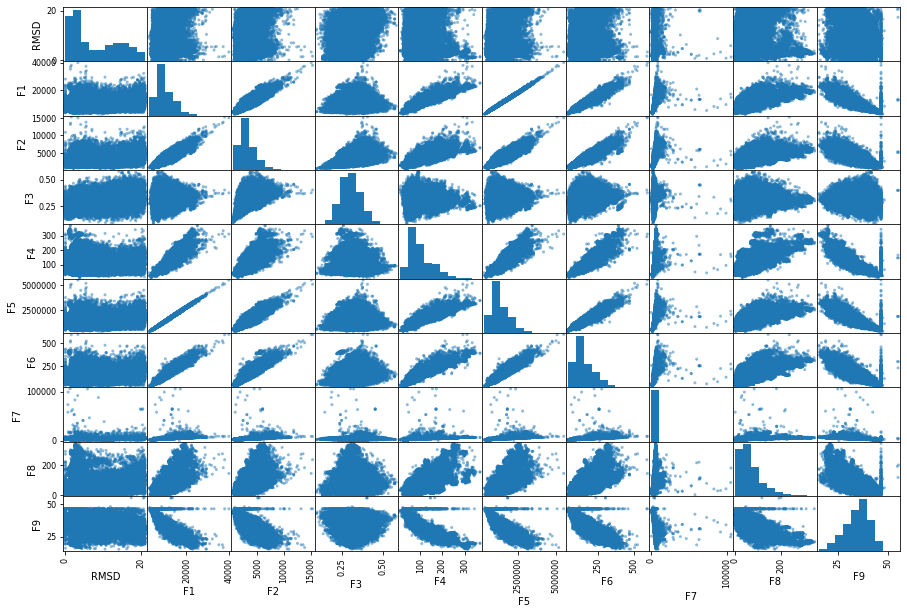

In [7]:
pd.plotting.scatter_matrix(train,figsize=(15,10))

In [8]:
train.columns

Index(['RMSD', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9'], dtype='object')

In [9]:
Predictors=['RMSD', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8']

Target=['F9']

X=train[Predictors].values
y=train[Target].values

In [10]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

In [11]:
X=PredictorScaler.fit_transform(X)
y=TargetVarScaler.fit_transform(y)

In [15]:
X[:]

array([[ 1.55853058,  0.9084815 ,  0.87958425, ...,  0.99603526,
         0.14953906,  0.56688489],
       [-0.28235687, -0.90674028, -0.95212657, ..., -0.83481347,
        -0.33149159, -0.54830097],
       [ 0.24949501, -0.52872535, -0.88170426, ..., -0.91211659,
        -0.50598911, -0.7253146 ],
       ...,
       [ 0.42617968, -0.52856025, -0.36043438, ..., -0.59944259,
        -0.35077877, -0.42439143],
       [ 0.33383293, -0.24461412,  0.02623274, ..., -0.43491041,
        -0.28490141, -0.51289825],
       [ 1.81072709,  0.70496229,  0.97451642, ...,  1.19746825,
         0.3195772 ,  1.25723804]])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32011, 9)
(32011, 1)
(13719, 9)
(13719, 1)


In [18]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [19]:
model = Sequential()
model.add(Dense(units=500, input_dim=9, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=100, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(units=40, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=1, kernel_initializer='normal', activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')


In [20]:
model.fit(X_test, y_train ,batch_size = 10, epochs = 10, verbose=1)

Epoch 1/10
32011/32011 [==============================] - 7s 232us/step - loss: 0.9952
Epoch 2/10
32011/32011 [==============================] - 6s 174us/step - loss: 0.9952
Epoch 3/10
32011/32011 [==============================] - 5s 172us/step - loss: 0.9952
Epoch 4/10
32011/32011 [==============================] - 5s 168us/step - loss: 0.9952
Epoch 5/10
32011/32011 [==============================] - 6s 180us/step - loss: 0.9952
Epoch 6/10
32011/32011 [==============================] - 5s 156us/step - loss: 0.9952
Epoch 7/10
32011/32011 [==============================] - 6s 174us/step - loss: 0.9952
Epoch 8/10
32011/32011 [==============================] - 6s 173us/step - loss: 0.9952
Epoch 9/10
32011/32011 [==============================] - 5s 170us/step - loss: 0.9952
Epoch 10/10
32011/32011 [==============================] - 6s 174us/step - loss: 0.9952


In [22]:
model.evaluate(X_test, y_test)

13719/13719 [==============================] - 0s 19us/step


1.0112402266720588

In [23]:
Predictions=model.predict(X_test)
Predictions=TargetVarScaler.inverse_transform(Predictions)
y_test_orig=TargetVarScaler.inverse_transform(y_test)
Test_Data=PredictorScaler.inverse_transform(X_test)
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,Price,PredictedPrice
0,18.858,7031.44,2456.97,0.34942,47.0180,1.008540e+06,88.0866,3998.06,3.0,38.7263,34.523663
1,1.834,17099.10,5994.03,0.35054,223.8060,2.316828e+06,278.8630,5468.55,135.0,23.3121,34.523663
2,2.732,16079.50,5807.81,0.36119,180.9630,2.250300e+06,272.1780,5617.59,149.0,23.8631,34.523663
3,4.337,13600.60,3520.54,0.25885,167.1890,1.865227e+06,221.0140,4804.69,115.0,28.5555,34.523663
4,3.032,7876.41,1984.92,0.25200,88.5033,1.051353e+06,112.9370,3535.51,29.0,36.0818,34.523663


In [24]:
model.history.history.values()

dict_values([[0.9952012128739984, 0.9951827600796174, 0.9951827608979685, 0.9951827606675454, 0.9951827609128646, 0.9951827615440844, 0.9951827605975139, 0.9951827622906901, 0.9951827599934996, 0.9951827610278434]])